---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup<br>
     Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 1<br>
        <span style="float: right;">WS 24/25</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 5</span><br>
     Themen: ROC<br>
     Abgabetermin: 13.12.2024, 23:59 Uhr <br>
    Punkte: 20
</p>


---

**Namen:** Elkhan Alimatov (ela0016), Mazen Zidan (maz4669) , Hamdah Mariyam (ham2119)

---

# 1. ROC

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hmari\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\hmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hmari\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
   

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hmari\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\hmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hmari\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
   

AttributeError: _ARRAY_API not found

## Aufgabe 1.1 [10 Punkte]
1. Schreiben Sie eine Funktion `calc_roc(y_labels, pred_prob)`, welche die Werte der ROC-Kurve (FPR, TPR , threshold) für ein binäre Klassifikation berechnet und diese zurückgibt. Die Eingaben `y_labels` enthält dabei die wahren Werte eine Zielvariablen und `pred_pob` ist ein Verktor mit Wahrscheinlichkeiten für die Zugehörigkeit des jeweiligen Sample zur positiven Klassen. Beispiele sind unterhalb der Aufgabe angegeben.
1. Erweitern Sie die Funktion so, dass sie zusätzlich den AUC berechnet und diesen ebenfalls zurückgibt, sprich `roc_values, auc = calc_roc(y_labels, pred_prob)`
1. Plotten Sie die ROC-Kurve für die unten agegebenen Vektoren `y_labels` und `pred_prob` und berechnen Sie die AUC
1. Bei welchen Schwellwert (Threshold) für die Entscheidung ob ein Sample zur Klasse 1 gehört ist die Accuracy am größten?

_Hinweis:_ 
* Für die Aufgabe dürfen Sie nicht die von Python (sklearn) bereitgestellten Funktionen für die Berechnung des roc und auc verwenden, sondern sollen diese selbständig entwickeln.
* Python stellt die Funktion `sklearn.metrics.roc_curve` zur Berechnung der TPR und FPR zur Verfügung. Sie können diese Funktion als Kontrolle nutzen, um die Richtigkeit Ihrer Berechnungen zu verifizieren.

In [2]:
y_labels = np.load(file="Daten Blatt 5/target.npy")
pred_prob = np.load(file="Daten Blatt 5/pred.npy")

print(y_labels.shape)

(400,)


In [3]:
#### Code HERE ####

def cal_roc(y_labels, pred_prob):
    P = sum(y_labels)
    N = len(y_labels) - P
    FPR = []
    TPR = []
    accuracies = []

    thresholds = np.sort(pred_prob)[::-1]
    # iterate through all thresholds and determine fraction of true positives
    # and false positives found at this threshold
    for thresh in thresholds:
        FP = 0
        TP = 0
        TN = 0
        FN = 0
        thresh = round(thresh, 2)  # Limiting floats to two decimal points
        for i in range(len(pred_prob)):
            if pred_prob[i] >= thresh:
                if y_labels[i] == 1:
                    TP += 1
                if y_labels[i] == 0:
                    FP += 1
            else:
                if y_labels[i] == 1:
                    FN += 1
                if y_labels[i] == 0:
                    TN += 1
        FPR.append(FP / N)
        TPR.append(TP / P)
        accuracy = (TP + TN) / (P + N)
        accuracies.append(accuracy)

    auc = np.trapz(TPR, FPR)
    FPR = sorted(FPR)
    TPR = sorted(TPR)
    best_threshold = thresholds[np.argmax(accuracies)] #best threshold is the one with the highest accuracy
    print("Best threshold: ", best_threshold)

    return [FPR, TPR], auc

Best threshold:  0.2922753272674487
AUC:  0.9296609719864177


C:\Users\hmari\AppData\Local\Temp\ipykernel_19692\1962992517.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(TPR, FPR)


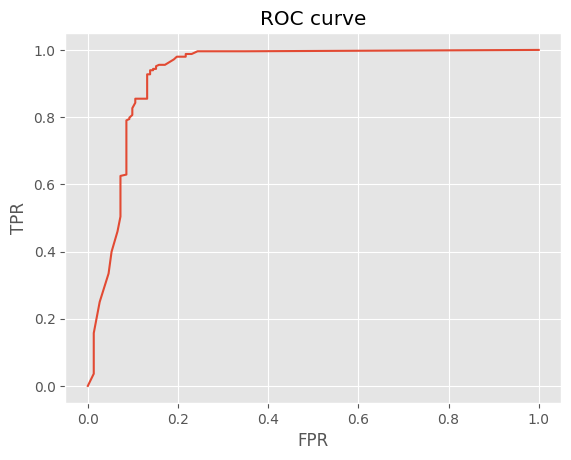

In [4]:
# 3. ROC curve and AUC for given data
roc, auc = cal_roc(y_labels, pred_prob)
print("AUC: ", auc)
plt.plot(roc[0], roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


AUC:  0.9310006366723259


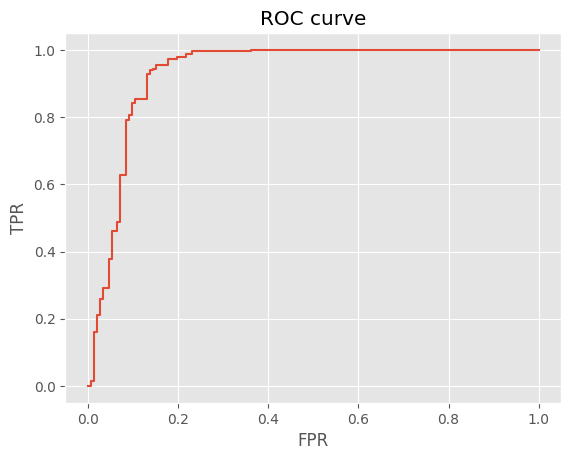

In [5]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_labels, pred_prob)
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Aufgabe 1.2 [10 Punkte]

**Daten:** Der Datensatz `creditcard_small.csv` ist ein gekürzter Datensatz mit weniger Variablen von dem Original-Datensatz https://www.kaggle.com/mlg-ulb/creditcardfraud. Er enthält anonymisierte Informationen von Kreditkartentransaktionen und ein Label `Class`, ob diese Transaktion betrügerisch war (`Class=1`), oder nicht (`Class=2`).

1. Trainieren Sie das Logistisches-Regrassionsmodell `log_reg = LogisticRegression()` (siehe Code unten) auf den Trainingsdaten `x_train, y_train` und machen Sie damit eine Vorhersage für die Testdaten `x_test`.
1. Berechnen Sie diverse Evaluationsmetriken für de Performance des Modells auf den Testdaten mittels einen Klassifikations-Report durch die Funktion `classification_report` aus dem Modul `sklearn.metrics`. Was ist die Accuracy, Precision, Sensitivity, Specificity und F1-Score für das Modell?
1. Berechnen Sie die AUC und plotten Sie die ROC-Kurve für die Testdaten. Interpretieren Sie dessen Verlauf. Sie können hier die Funktionen `sklearn.metrics.roc_curve` und `sklearn.metrics.roc_auc_score` benutzen.
1. Trainieren Sie das Neuronale Netz `nn = MLPClassifier(activation="relu")` auf den Trainigsdaten `x_train, y_train`. Wie ist die AUC bei diesem Modell auf den Testdaten? Plotten Sie auch hier die ROC-Kurve und vergleichen Sie diese mit der der Logistischen Regression.

**Vorgeschriebener Code. Bitte nicht verändern**

In [6]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [7]:
#load data
data = pd.read_csv("Daten Blatt 5/creditcard_small.csv")
data

,V5,V6,V7,V8,V27,V28,Class
0,-0.338321,0.462388,0.239599,0.098698,0.133558,-0.021053,0
1,0.060018,-0.082361,-0.078803,0.085102,-0.008983,0.014724,0
2,-0.503198,1.800499,0.791461,0.247676,-0.055353,-0.059752,0
3,-0.010309,1.247203,0.237609,0.377436,0.062723,0.061458,0
4,-0.407193,0.095921,0.592941,-0.270533,0.219422,0.215153,0
...,...,...,...,...,...,...,...
284802,-5.364473,-2.606837,-4.918215,7.305334,0.943651,0.823731,0
284803,0.868229,1.058415,0.024330,0.294869,0.068472,-0.053527,0
284804,2.630515,3.031260,-0.296827,0.708417,0.004455,-0.026561,0
284805,-0.377961,0.623708,-0.686180,0.679145,0.108821,0.104533,0


In [8]:
#Split into train and test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=1)

In [9]:
y_train = data_train.Class
x_train = data_train.drop(columns=["Class"])

y_test = data_test.Class
x_test = data_test.drop(columns=["Class"])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
log_reg = LogisticRegression()
nn = MLPClassifier(activation="relu")

**Ihren Code ab hier einfügen**

In [11]:
#### CODE HERE ####
from sklearn.metrics import classification_report
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.66      0.16      0.25       135

    accuracy                           1.00     85443
   macro avg       0.83      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443



AUC:  0.839033636722013


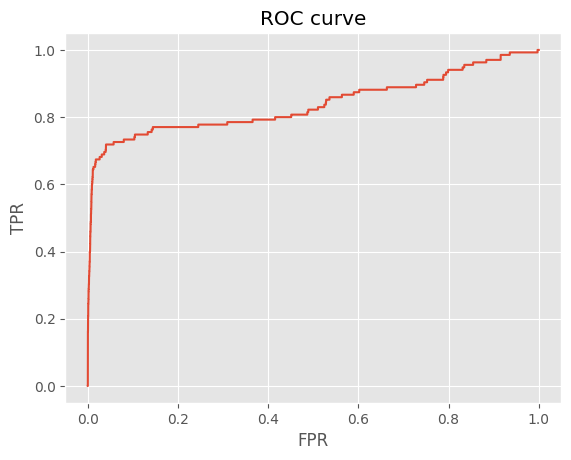

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC: ", roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [13]:
nn.fit(x_train, y_train)
y_pred_nn= nn.predict(x_test)
y_pred_prob_nn = nn.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred_nn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.76      0.49      0.59       135

    accuracy                           1.00     85443
   macro avg       0.88      0.74      0.80     85443
weighted avg       1.00      1.00      1.00     85443



AUC:  0.932403717075729


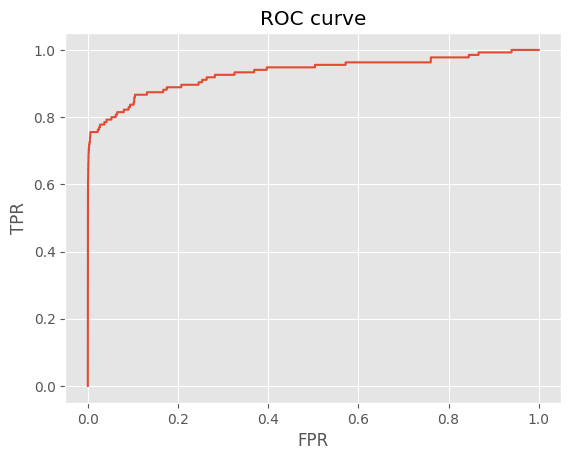

In [14]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_prob_nn)
print("AUC: ", roc_auc_nn)
plt.plot(fpr_nn, tpr_nn)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


Die AUC ist für den MLP-Klassifikator größer, was bedeutet, dass dieses Modell besser klassifiziert.